# **Ex3**

## Names and IDs

1.   Amit Avraham - 315071910
2.   Oded Atias - 311394365
3.   Barak Haziz - 316055631

## 1. Fuel efficiency price prediction (35 points)
In this section we will use regression tree model for predicting the fuel efficiency for different cars


The features data available here:
https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv

The labels are here:
https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
!pip install shap
import shap
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import numpy as np
from copy import deepcopy



# load the data
import pandas as pd
y = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv')
X = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.5 MB/s eta 0:00:00


### EDA visuallization (5pts)

Explore the data. What features are meaningful? what are the correlated features? display statistcs about the data itself including it's value ranges.

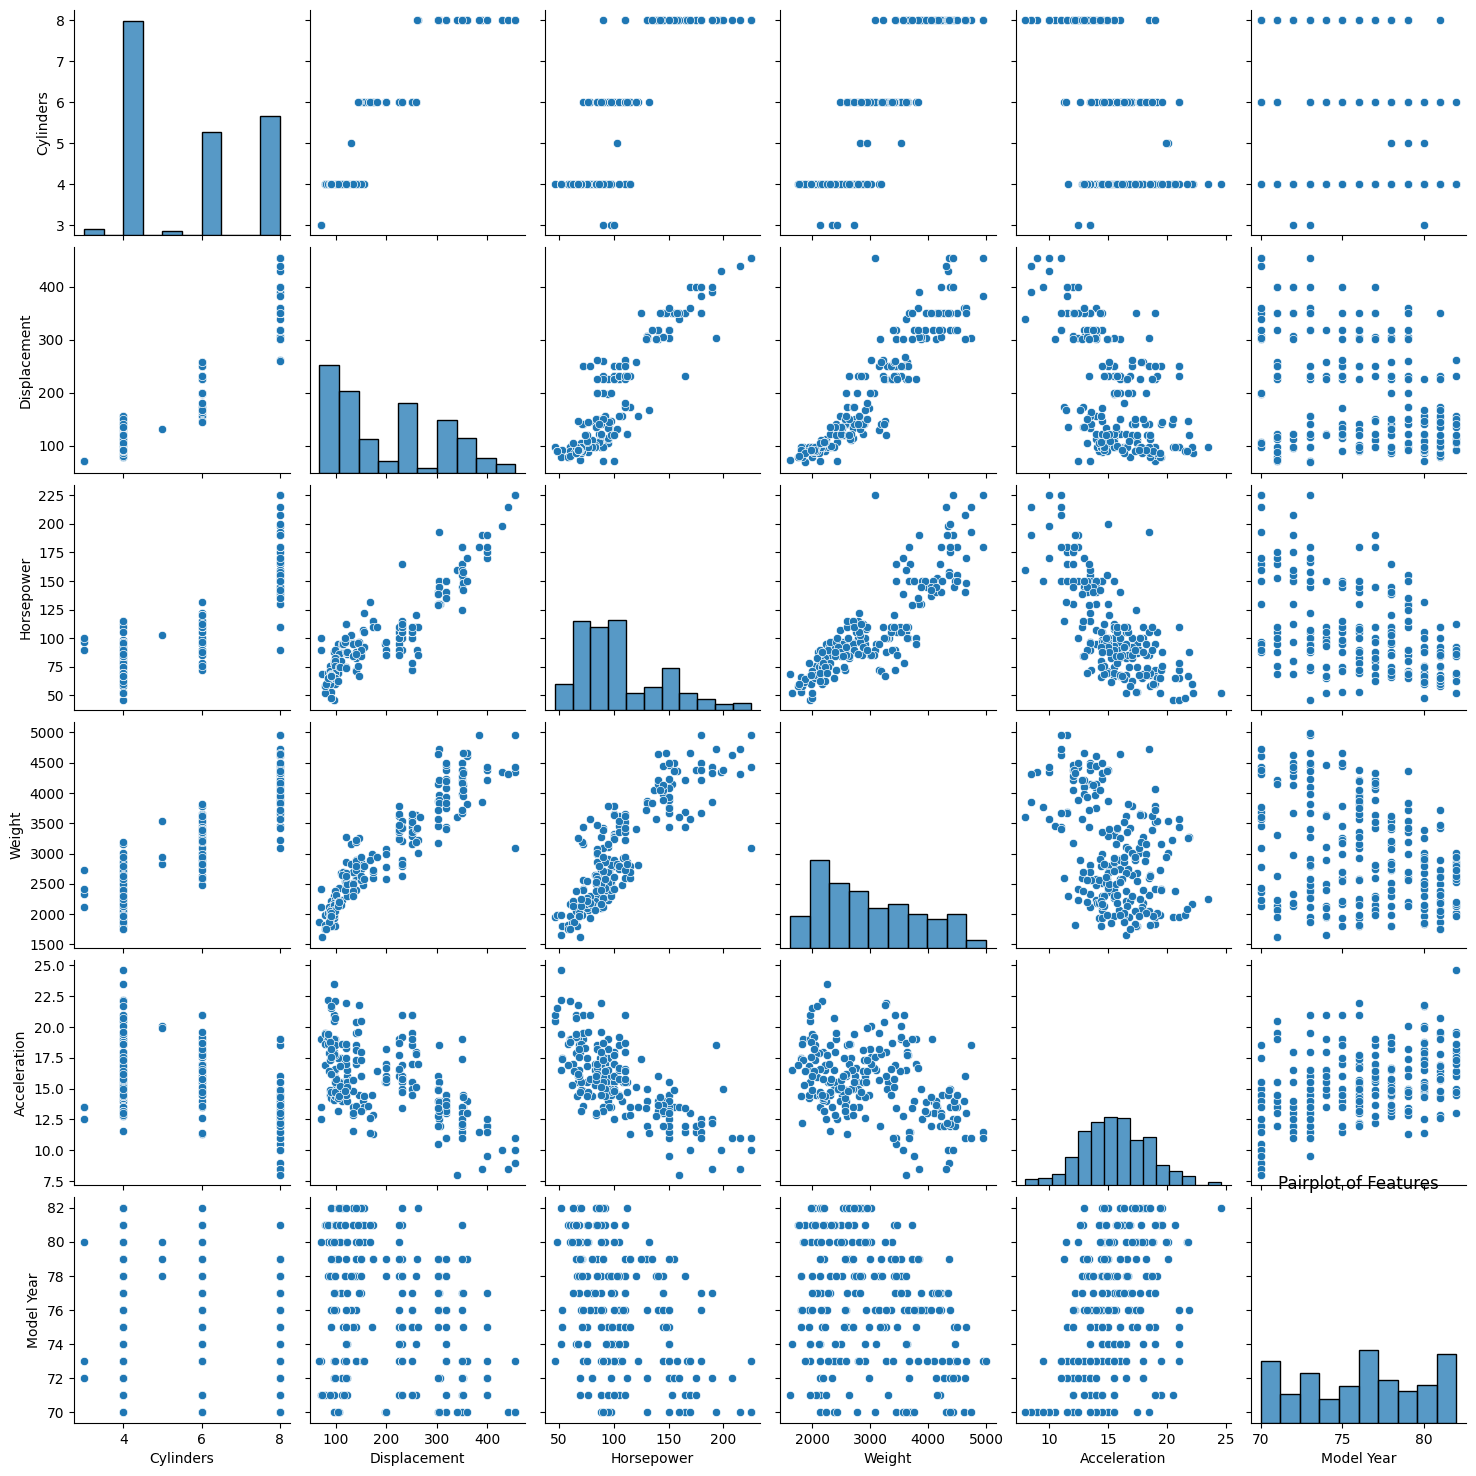

In [2]:
# EDA
sns.pairplot(X)
plt.title("Pairplot of Features")
plt.show()

### EDA insights (5pts)

What are you insgits based on the previuse visualization?

<ipython-input-3-0c1296154f9f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")


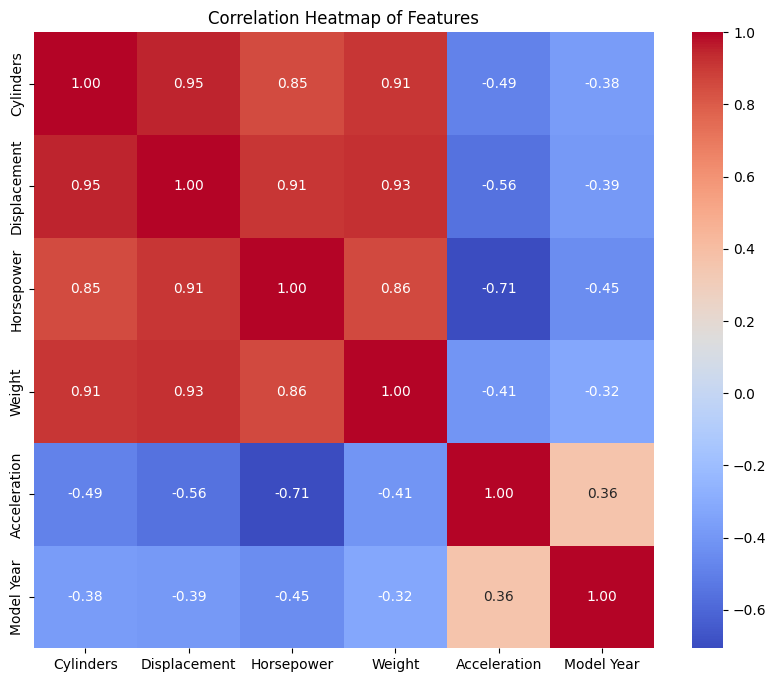

Data Statistics:
        Cylinders  Displacement  Horsepower       Weight  Acceleration  \
count  307.000000    288.000000  284.000000   293.000000    305.000000   
mean     5.527687    199.633681  105.109155  2975.184300     15.618689   
std      1.702089    103.550163   38.472863   842.988873      2.825252   
min      3.000000     68.000000   46.000000  1613.000000      8.000000   
25%      4.000000    105.000000   75.000000  2234.000000     13.700000   
50%      5.000000    156.000000   95.000000  2795.000000     15.500000   
75%      8.000000    302.000000  130.000000  3620.000000     17.500000   
max      8.000000    455.000000  225.000000  4997.000000     24.600000   

       Model Year  
count  311.000000  
mean    76.122186  
std      3.673513  
min     70.000000  
25%     73.000000  
50%     76.000000  
75%     79.000000  
max     82.000000  


In [3]:
# Graph 2 -
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


# Data Statistics
print("Data Statistics:")
print(X.describe())

### Preprocessing (5pts)

Apply preprocessing according to your data, handle missing values and split the dataset into train-test as well.
Explain the reason for all methods that you apply.

Make sure that it doesn't affect the data charateristics. Which means that the correlations stay the same (if it was not corelated before it shouldn't be now).

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer


# Label Encoding for text features
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Handle missing values
X_imputed = imputer.fit_transform(X_encoded)

# Convert the imputed array back to a DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X_encoded.columns)

#normalization
scaler = MinMaxScaler()
X_imputed[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']] = scaler.fit_transform(X_imputed[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']])

# Check if correlations remain the same
correlation_before = X_encoded.corr()
correlation_after = X_imputed.corr()

print("Correlation Before Imputation:")
print(correlation_before)

print("\nCorrelation After Imputation:")
print(correlation_after)



Correlation Before Imputation:
              Cylinders  Displacement  Horsepower    Weight  Acceleration  \
Cylinders      1.000000      0.238237    0.269255  0.332764     -0.125446   
Displacement   0.238237      1.000000    0.327987  0.263361     -0.185140   
Horsepower     0.269255      0.327987    1.000000  0.249960     -0.200802   
Weight         0.332764      0.263361    0.249960  1.000000     -0.121736   
Acceleration  -0.125446     -0.185140   -0.200802 -0.121736      1.000000   
Model Year    -0.156473     -0.146119   -0.198280 -0.182100      0.149602   
Origin         0.239865      0.245720    0.141721  0.216978     -0.091500   

              Model Year    Origin  
Cylinders      -0.156473  0.239865  
Displacement   -0.146119  0.245720  
Horsepower     -0.198280  0.141721  
Weight         -0.182100  0.216978  
Acceleration    0.149602 -0.091500  
Model Year      1.000000 -0.002277  
Origin         -0.002277  1.000000  

Correlation After Imputation:
              Cylinders  

### Model training and evaluation (10 pts)


Split the data into train-test with 80-20% ratio.
Train the regression tree model on the training set and check it's performance on the test set using two evaluation metrics.
Compare the results and write your conclusion

In [5]:
# Model training
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
# Train a regression tree model
regression_tree = DecisionTreeRegressor(random_state=42)
regression_tree.fit(X_train, y_train)
# Predict on the test set
y_pred = regression_tree.predict(X_test)

In [6]:
# Evaluation
# Evaluate the model's performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Evaluate the model's performance using R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 3.9762499999999994
R-squared (R2) Score: 0.4844902681516853


### Explainability (10 pts)

1. Use the SHAP tool for explaining how each feature contributes to the model (i,e, explain the training set)
2. Choose 3 different cars  explain thier spesific predictions results (i,e, what was important for this spesific cars)


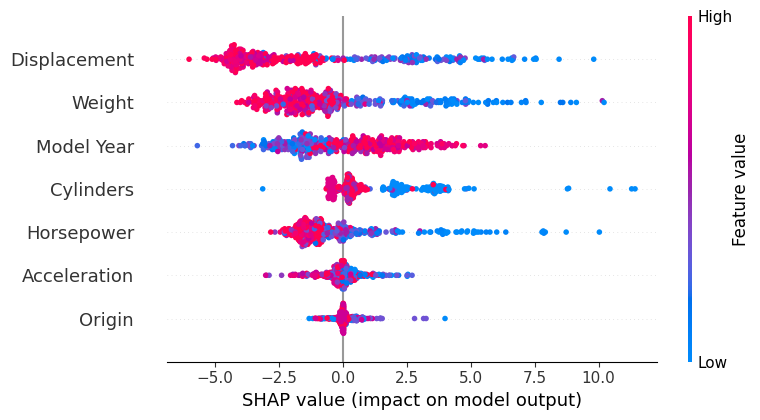

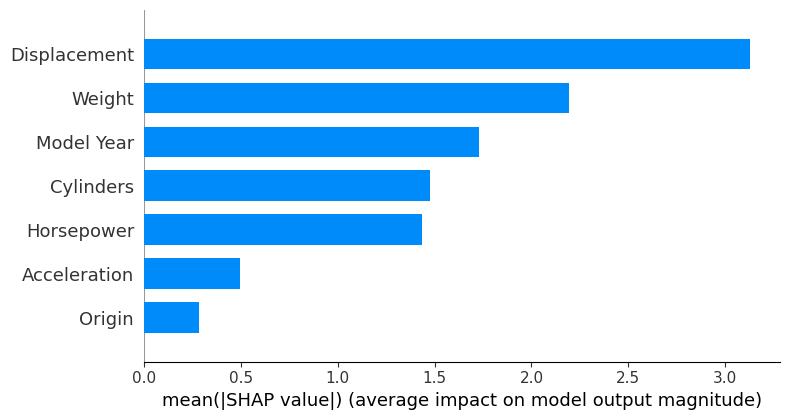

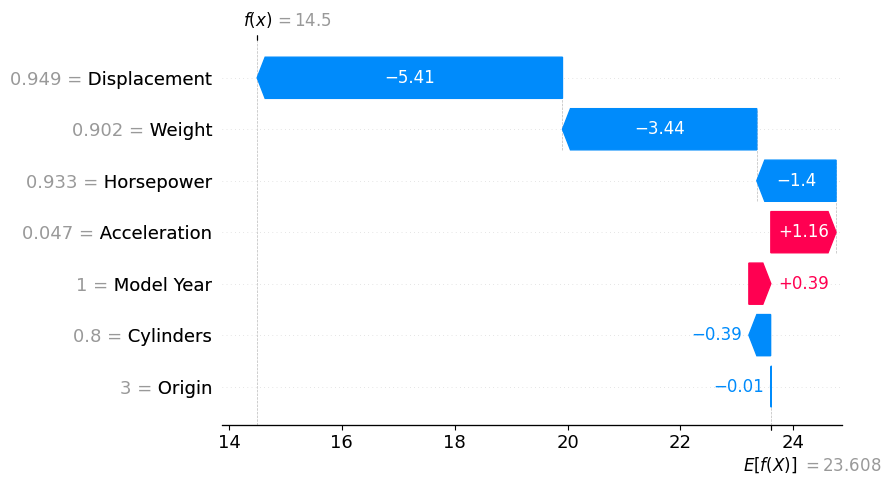

the lower values of displacement are the most influential


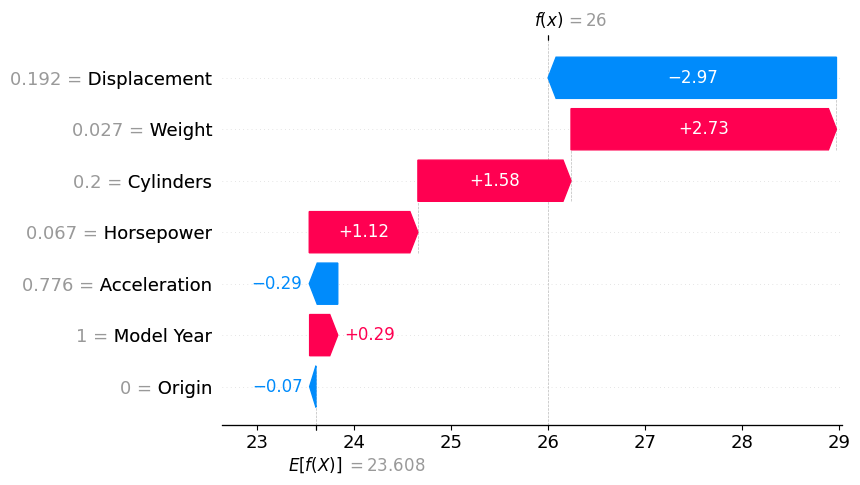

the lower values of displacement and the higher values of weight are the most influential


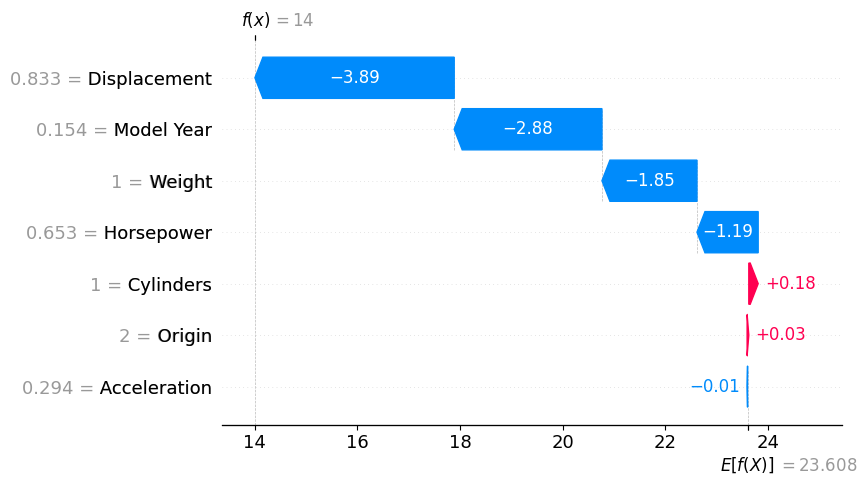

the lower values of displacement are the most influential


In [7]:
explainer = shap.Explainer(regression_tree)
shap_values = explainer(X_imputed)
shap.summary_plot(shap_values, X_imputed)
shap.summary_plot(shap_values, X_imputed, plot_type = "bar")

#choose 3 cars from test set and explain the resulte
#first car
shap.plots.waterfall(shap_values[5])
print("the lower values of displacement are the most influential")

#second car
shap.plots.waterfall(shap_values[55])
print("the lower values of displacement and the higher values of weight are the most influential")

#third car
shap.plots.waterfall(shap_values[73])
print("the lower values of displacement are the most influential")


## 2. Classification evaluation (15 points)

Submit question 2 as a PDF file with the calculations, graphs and explainations.

### ROC and precision recall curve (8 pts)

Calculate ROC curve and precision recall curve with the follwing tresholds: [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
The probabilities are:

| label | classifier 1 | classifier 2|
|--------|----------|---------------|
|1|0.41|1.00|
|0	|0.00	|0.72
|0	|0.00	|0.99
|1	|0.73	|0.14
|0	|0.62	|0.00
|1	|1.00	|0.94
|0	|1.00	|0.10
|1	|0.14	|0.77
|0	|0.00	|0.02
|1	|0.55	|1.00






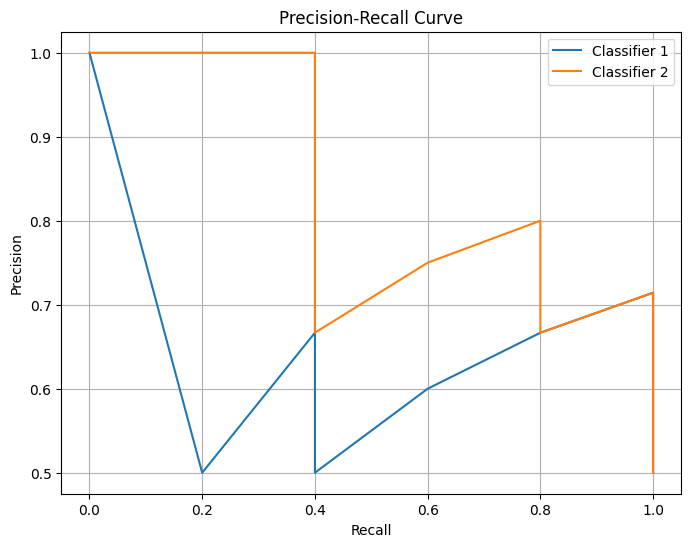

In [8]:
# Provided data
from sklearn.metrics import precision_recall_curve
labels = np.array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1])
predictions_classifier1 = np.array([0.41, 0.00, 0.00, 0.73, 0.62, 1.00, 1.00, 0.14, 0.00, 0.55])
predictions_classifier2 = np.array([1.00, 0.72, 0.99, 0.14, 0.00, 0.94, 0.10, 0.77, 0.02, 1.00])

# Calculate precision and recall
precision1, recall1, _ = precision_recall_curve(labels, predictions_classifier1)
precision2, recall2, _ = precision_recall_curve(labels, predictions_classifier2)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall1, precision1, label='Classifier 1')
plt.plot(recall2, precision2, label='Classifier 2')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

Answer the following questions:
1. Which model is better based on those graphs?
2. If those models predict heart attack, choose a 'one threshold' metric (such as acc, precision, etc..) and explain why it's a suitable metric for this case.

### Curves differences (7 pts)

Create a new table with two columns: 'label' and 'predictions'. Fill the table with 10 rows of values representing binary labels and corresponding predicted probabilities.
Ensure that the values chosen for the predictions are deliberately selected to make the ROC curve and precision-recall curve look different - which means that according to one curve the model is good, and according to the second one it's bad.
After filling the table, draw both the ROC curve and precision-recall curve using the provided data.
Explain the values that you chose and the reason for the change.

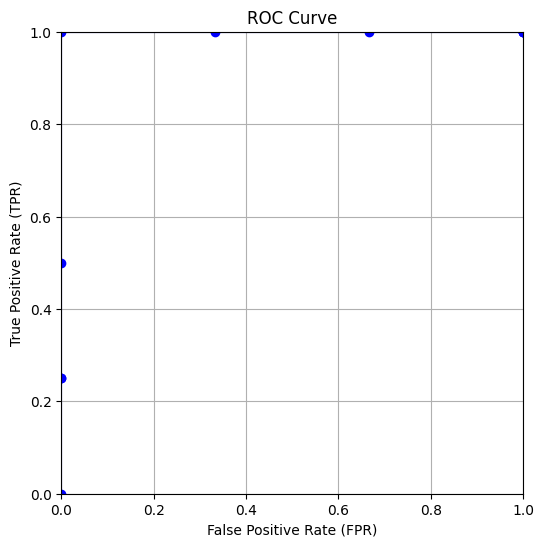

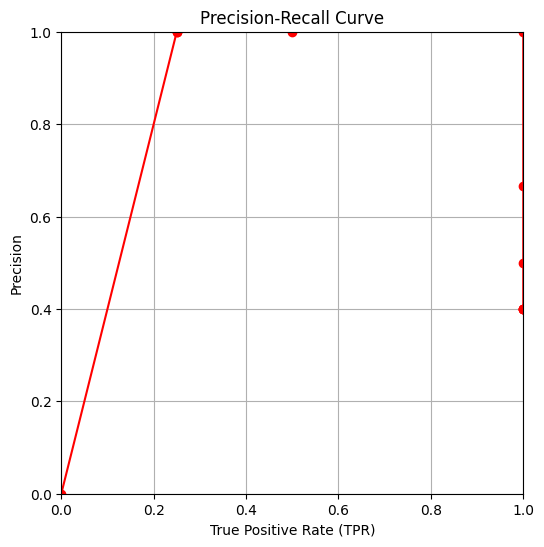

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Given FPR and TPR values
fpr_values = [1, 1, 1, 1, 4/6, 2/6, 0, 0, 0, 0, 0]
tpr_values = [1, 1, 1, 1, 1, 1, 1, 1/2, 1/4, 1/4, 0]

# Plot TPR vs FPR
plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, marker='o', linestyle='-', color='b')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Given TPR and Precision values
tpr_values = [1, 1, 1, 1, 1, 1, 1, 1/2, 1/4, 1/4, 0]
precision_values = [4/10, 4/10, 4/10, 4/10, 4/8, 4/6, 4/4, 2/2, 1/1, 1/1, 0]

# Plot Precision vs TPR
plt.figure(figsize=(8, 6))
plt.plot(tpr_values, precision_values, marker='o', linestyle='-', color='r')
plt.xlabel('True Positive Rate (TPR)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## 3. Ensembel (40 pts)

### implement adaBoost (25 pts)
implement the adaboost algorithm from scratch, refer to the lecture slides for the algorithm 43.
you may add any helper functions if needed but make sure to add documentation if you do so.
note, the base_estimator in sklearn supports sample_weight, you may use it if you want to.

In [10]:
class AdaBoost:
    def __init__(self, n_estimators=50, base_estimator=None):
        self.n_estimators = n_estimators
        self.base_estimator = base_estimator
        self.estimators = []
        self.estimator_weights = []

    def fit(self, X, y):

        # Initialize weights
        n_samples = len(X)
        sample_weights = np.ones(n_samples) / n_samples

        # Ensure y is in {-1, 1} for internal calculations
        y_converted = np.where(y == 0, -1, 1)

        for _ in range(self.n_estimators):
            # Train weak learner
            weak_learner = deepcopy(self.base_estimator)
            weak_learner.fit(X, y_converted, sample_weight=sample_weights)

            # Predict on training data
            y_pred = weak_learner.predict(X)

            # Calculate weighted error
            error = np.sum(sample_weights * (y_pred != y_converted))

            # Calculate estimator weight
            estimator_weight = 0.5 * np.log((1 - error) / (error + 1e-10))

            # Update sample weights
            sample_weights *= np.exp(-estimator_weight * y_converted * y_pred)
            sample_weights /= np.sum(sample_weights)

            # Save the estimator and its weight
            self.estimators.append(weak_learner)
            self.estimator_weights.append(estimator_weight)

    def predict(self, X):
        n_samples = len(X)
        predictions = np.zeros(n_samples)

        for estimator, estimator_weight in zip(self.estimators, self.estimator_weights):
            predictions += estimator_weight * estimator.predict(X)

        # Return predictions in original label space
        return np.where(np.sign(predictions) == -1, 0, 1)


### Model training
train the adaboost model using the synthetic data below, use the following base estimators n_estimators=3,5,10:
1. DecisionTreeClassifier with max_depth=1
2. DecisionTreeClassifier with max_depth=3
3. svm.SVC with kernel='linear'


In [12]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
base_estimators = {
    'DecisionTree_max_depth_1': DecisionTreeClassifier(max_depth=1),
    'DecisionTree_max_depth_3': DecisionTreeClassifier(max_depth=3),
    'SVM_linear_kernel': SVC(kernel='linear')
}

# Define number of estimators
n_estimators_list = [3, 5, 10]

# Train AdaBoost classifiers with different base estimators and number of estimators
for base_name, base_estimator_loop in base_estimators.items():
    print(f"Base Estimator: {base_name}")
    for n_estimators_loop in n_estimators_list:
        # Initialize AdaBoost classifier
        adaboost= AdaBoost(base_estimator=base_estimator_loop,n_estimators=n_estimators_loop)

        # Train the classifier
        adaboost.fit(X, y)

        # Predictions on the same dataset
        y_pred = adaboost.predict(X)

        # Calculate accuracy
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        print(f"  Number of Estimators: {n_estimators_loop}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}")



Base Estimator: DecisionTree_max_depth_1
  Number of Estimators: 3, Accuracy: 0.7260, Precision: 0.8169
  Number of Estimators: 5, Accuracy: 0.7950, Precision: 0.8267
  Number of Estimators: 10, Accuracy: 0.8270, Precision: 0.8030
Base Estimator: DecisionTree_max_depth_3
  Number of Estimators: 3, Accuracy: 0.8570, Precision: 0.8017
  Number of Estimators: 5, Accuracy: 0.9160, Precision: 0.8835
  Number of Estimators: 10, Accuracy: 0.9620, Precision: 0.9772
Base Estimator: SVM_linear_kernel
  Number of Estimators: 3, Accuracy: 0.8720, Precision: 0.8520
  Number of Estimators: 5, Accuracy: 0.8700, Precision: 0.8514
  Number of Estimators: 10, Accuracy: 0.8700, Precision: 0.8514


### Model comparison (5 pts)
compare the models using the following metrics:
1. accuracy
2. precision

see output of code above.

### compare number of learners (10 pts)
Choose the best base estimator from the previous section.
Compare the effect of the number of learners on the models error on both the training set and validation set.
use n_estimators = [1,5,10,20,50,100] and plot the error rate for each number of learners.
discuss the results.

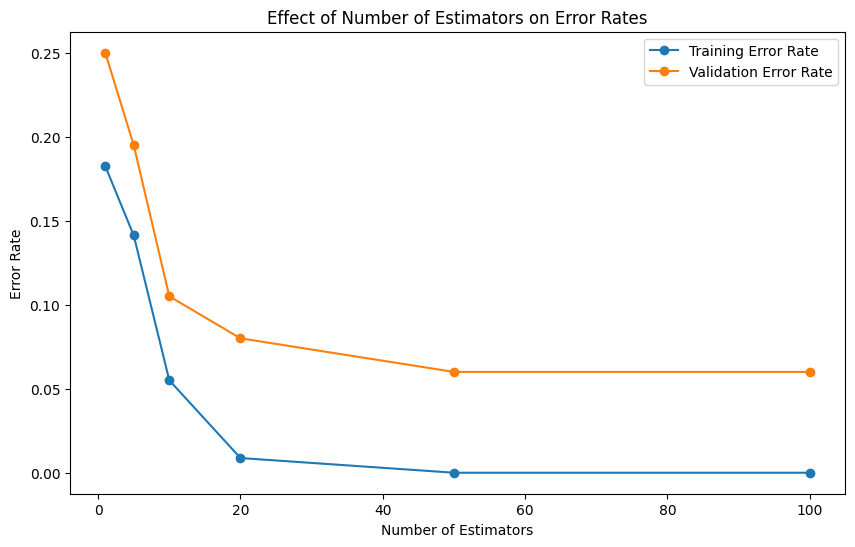

In [13]:
# Initialize variables to store error rates
train_errors = []
val_errors = []

# range of n_estimators
n_estimators_list = [1, 5, 10, 20, 50, 100]

# Initialize AdaBoost model with DecisionTreeClassifier (max_depth=3) as the base estimator
best_base_estimator = DecisionTreeClassifier(max_depth=3)
ada_boost_best_estimator = AdaBoost(n_estimators=10,base_estimator=best_base_estimator)

# Train AdaBoost classifiers with different number of learners
for n_estimators in n_estimators_list:
    # Initialize AdaBoost classifier
    ada_boost_best_estimator.n_estimators=n_estimators

    # Train the classifier
    ada_boost_best_estimator.fit(X_train, y_train)

    # Predictions on training and validation sets
    y_train_pred = ada_boost_best_estimator.predict(X_train)
    y_val_pred =  ada_boost_best_estimator.predict(X_test)

    # Calculate error rates
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    val_error = 1 - accuracy_score(y_test, y_val_pred)

    # Append error rates to lists
    train_errors.append(train_error)
    val_errors.append(val_error)


# Plot the error rates
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_errors, label='Training Error Rate', marker='o')
plt.plot(n_estimators_list, val_errors, label='Validation Error Rate', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate')
plt.title('Effect of Number of Estimators on Error Rates')
plt.legend()
plt.show()




## 4. SVM (10 points)

Submit question 4 in the pdf file.

### Find the SVM formula (6 pts)

Given the following points find and draw the SVM formula (hyperplane formula):

| x1 | x2 | class|
|--------|----------|---------------|
|1|6|-|
|1	|10	|-
|4	|11	|-
|6	|1	|+
|7	|6	|+
|10	|4	|+

### Margin size (4 pts)

Based on the hyperplane, calculate the margin size.